# 4. Sensor Data Interpolation

In [1]:
from datetime import datetime
import random

from sklearn.preprocessing import MinMaxScaler
from IPython.display import display
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
ANON_HIGH_RES_DATASET = "../data/Anonymized High Resolution Dataset (8 Days).csv"

## 4.1 Import datasets

In [3]:
df_anon_high_res = pd.read_csv(ANON_HIGH_RES_DATASET, sep=';')

## 4.2 Preprocess data

### 4.2.1 Prepare data

**Rename columns**

In [4]:
df_anon_high_res = df_anon_high_res.rename(columns={
    "TS": "timestamp",
    "Tag": "sensor_tag",
    "Value": "value",
    "Sensor Type": "sensor_type",
    "Equipment Type": "equipment_type",
})

**Set categorical values**

In [5]:
df_anon_high_res["sensor_tag"] = df_anon_high_res["sensor_tag"].str.split(" ").apply(lambda x: f"{x[0].upper()}_{x[1].zfill(2)}")
df_anon_high_res["sensor_type"] = df_anon_high_res["sensor_type"].str.upper()
df_anon_high_res["equipment_type"] = df_anon_high_res["equipment_type"].str.upper()

In [6]:
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_01", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_02", "sensor_type"] = "FLOW"

df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_03", "sensor_type"] = "COUNTER"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_04", "sensor_type"] = "UNKNOWN"

df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_05", "sensor_type"] = "MEASUREMENT"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_06", "sensor_type"] = "MEASUREMENT"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_07", "sensor_type"] = "MEASUREMENT"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_08", "sensor_type"] = "MEASUREMENT"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_09", "sensor_type"] = "MEASUREMENT"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_10", "sensor_type"] = "MEASUREMENT"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_11", "sensor_type"] = "MEASUREMENT"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_12", "sensor_type"] = "MEASUREMENT"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_13", "sensor_type"] = "MEASUREMENT"

df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_14", "sensor_type"] = "SETTING"

df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_15", "sensor_type"] = "TEMPERATURE"

df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_16", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_17", "sensor_type"] = "ACTUAL"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_18", "sensor_type"] = "SPEED"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_19", "sensor_type"] = "ACTUAL"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_20", "sensor_type"] = "SPEED"

df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_21", "sensor_type"] = "PERCENTAGE"

df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_22", "sensor_type"] = "CURRENT"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_23", "sensor_type"] = "FREQUENCY"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_24", "sensor_type"] = "TEMPERATURE"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_25", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_26", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_27", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_28", "sensor_type"] = "FLOW"

df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_29", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_30", "sensor_type"] = "TEMPERATURE"

df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_31", "sensor_type"] = "SETTING"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_32", "sensor_type"] = "SETTING"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_33", "sensor_type"] = "SETTING"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_34", "sensor_type"] = "SETTING"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_35", "sensor_type"] = "SETTING"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_36", "sensor_type"] = "SETTING"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_37", "sensor_type"] = "SETTING"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_38", "sensor_type"] = "SETTING"

df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_39", "sensor_type"] = "PRESSURE"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_40", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_41", "sensor_type"] = "PRESSURE"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_42", "sensor_type"] = "TEMPERATURE"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_43", "sensor_type"] = "PRESSURE"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_44", "sensor_type"] = "TEMPERATURE"

df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_45", "sensor_type"] = "FREQUENCY"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_46", "sensor_type"] = "FREQUENCY"

df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_47", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_48", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_49", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_50", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_51", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_52", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_53", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_54", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_55", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_56", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_57", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_58", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_59", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_60", "sensor_type"] = "FLOW"

df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_61", "sensor_type"] = "SPEED"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_62", "sensor_type"] = "PERCENTAGE"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_63", "sensor_type"] = "TIME"

df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_64", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_65", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_66", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_67", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_68", "sensor_type"] = "FLOW"
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_69", "sensor_type"] = "FLOW"

In [7]:
df_anon_high_res.loc[df_anon_high_res["sensor_tag"] == "SENSOR_15", "equipment_type"] = "TANK"

**Set data types**

In [8]:
df_anon_high_res["timestamp"] = pd.to_datetime(df_anon_high_res["timestamp"])
df_anon_high_res["sensor_tag"] = df_anon_high_res["sensor_tag"].astype("category")
df_anon_high_res["value"] = df_anon_high_res["value"].astype("float")
df_anon_high_res["sensor_type"] = df_anon_high_res["sensor_type"].astype("category")
df_anon_high_res["equipment_type"] = df_anon_high_res["equipment_type"].astype("category")

### 4.2.2 Clean data

**Remove duplicate rows**

In [9]:
print(f"Rows (Before): {df_anon_high_res.shape[0]}")
df_anon_high_res = df_anon_high_res.drop_duplicates(subset = ['timestamp', 'sensor_tag'], keep = False)
print(f"Rows (After): {df_anon_high_res.shape[0]}")

Rows (Before): 1416864
Rows (After): 1416381


**Remove missing data**

In [10]:
print(f"Rows (Before): {df_anon_high_res.shape[0]}")
df_anon_high_res = df_anon_high_res.dropna(subset="value")
print(f"Rows (After): {df_anon_high_res.shape[0]}")

Rows (Before): 1416381
Rows (After): 1393345


**Remove unused sensors**

In [11]:
exclude = [
    "SENSOR_04", # No variation
    "SENSOR_05", # Irregular lab measurements
    "SENSOR_06", # Irregular lab measurements
    "SENSOR_07", # Irregular lab measurements
    "SENSOR_08", # Irregular lab measurements
    "SENSOR_09", # Irregular lab measurements
    "SENSOR_10", # Irregular lab measurements
    "SENSOR_11", # Irregular lab measurements
    "SENSOR_12", # Irregular lab measurements
    "SENSOR_13", # Irregular lab measurements
    "SENSOR_14", # Ignore this sensor (Arjen)
    "SENSOR_17", # No data points
    "SENSOR_18", # No data points
    "SENSOR_19", # No data points
    "SENSOR_20", # No data points
    "SENSOR_46", # No variation
    "SENSOR_50", # No variation
    "SENSOR_54", # No variation
]

df_anon_high_res = df_anon_high_res[~df_anon_high_res["sensor_tag"].isin(exclude)]

**Reset index**

In [12]:
df_anon_high_res = df_anon_high_res.reset_index(drop=True)

**Sort rows**

In [13]:
df_anon_high_res = df_anon_high_res.sort_values(["sensor_tag", "timestamp"])

### 4.2.3 Interpolate data

In [14]:
%%time
# Set index to timestamp
df_anon_high_res.index = df_anon_high_res["timestamp"]
df_anon_high_res = df_anon_high_res.drop(["timestamp"], axis=1)

# Create dataframe and min/max dates
df_anon_high_res_interpolated = pd.DataFrame(columns=df_anon_high_res.columns)
df_anon_high_res_min_date = df_anon_high_res.index.min()
df_anon_high_res_max_date = df_anon_high_res.index.max()

for sensor_tag in tqdm(df_anon_high_res["sensor_tag"].unique()):
    df_subset = df_anon_high_res[df_anon_high_res["sensor_tag"] == sensor_tag]

    # Update min/max dates
    if df_subset.index.min() >= df_anon_high_res_min_date:
        df_anon_high_res_min_date = df_subset.index.min()
    if df_subset.index.max() <= df_anon_high_res_max_date:
        df_anon_high_res_max_date = df_subset.index.max()

    # Determine interpolation method
    if sensor_tag in [
        "SENSOR_01",
        "SENSOR_02",
        "SENSOR_28",
        "SENSOR_29",
        "SENSOR_31",
        "SENSOR_32",
        "SENSOR_32",
        "SENSOR_33",
        "SENSOR_34",
        "SENSOR_35",
        "SENSOR_36",
        "SENSOR_37",
        "SENSOR_38",
        "SENSOR_32",
        "SENSOR_40",
    ]:
        method = "ffill"
    else:
        method = "linear"

    # Interpolate data
    df_subset_interpolated = pd.DataFrame(df_subset["value"].resample("1S").interpolate(method))
    df_subset_interpolated["sensor_tag"] = sensor_tag
    df_subset_interpolated["sensor_type"] = df_subset["sensor_type"][0]
    df_subset_interpolated["equipment_type"] = df_subset["equipment_type"][0]

    # Add interpolated data
    df_anon_high_res_interpolated = pd.concat([df_anon_high_res_interpolated, df_subset_interpolated], axis=0)

# Set data types
df_anon_high_res_interpolated["sensor_tag"] = df_anon_high_res_interpolated["sensor_tag"].astype("category")
df_anon_high_res_interpolated["value"] = df_anon_high_res_interpolated["value"].astype("float")
df_anon_high_res_interpolated["sensor_type"] = df_anon_high_res_interpolated["sensor_type"].astype("category")
df_anon_high_res_interpolated["equipment_type"] = df_anon_high_res_interpolated["equipment_type"].astype("category")

# Restore index to range
print(f"Rows (Before): {df_anon_high_res_interpolated.shape[0]}")
df_anon_high_res_interpolated = df_anon_high_res_interpolated.reset_index(names="timestamp")
df_anon_high_res_interpolated = df_anon_high_res_interpolated[
    (df_anon_high_res_interpolated["timestamp"] >= df_anon_high_res_min_date)
    & (df_anon_high_res_interpolated["timestamp"] <= df_anon_high_res_max_date)
]
df_anon_high_res = df_anon_high_res.reset_index(names="timestamp")
print(f"Rows (After): {df_anon_high_res_interpolated.shape[0]}")

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 51/51 [00:21<00:00,  2.36it/s]


Rows (Before): 35246354
Rows (After): 35239419
CPU times: user 18.3 s, sys: 8.8 s, total: 27.1 s
Wall time: 27 s


## 4.3 Explore data

### 4.3.1 Inspect rows

In [15]:
df_anon_high_res.head(10)

,timestamp,sensor_tag,value,sensor_type,equipment_type
0,2022-01-24 00:00:15,SENSOR_01,0.0,FLOW,PUMP
1,2022-01-24 00:02:15,SENSOR_01,0.0,FLOW,PUMP
2,2022-01-24 00:04:15,SENSOR_01,0.0,FLOW,PUMP
3,2022-01-24 00:06:15,SENSOR_01,0.0,FLOW,PUMP
4,2022-01-24 00:08:15,SENSOR_01,0.0,FLOW,PUMP
5,2022-01-24 00:10:15,SENSOR_01,0.0,FLOW,PUMP
6,2022-01-24 00:12:15,SENSOR_01,0.0,FLOW,PUMP
7,2022-01-24 00:14:15,SENSOR_01,0.0,FLOW,PUMP
8,2022-01-24 00:16:15,SENSOR_01,0.0,FLOW,PUMP
9,2022-01-24 00:18:15,SENSOR_01,0.0,FLOW,PUMP


In [16]:
df_anon_high_res_interpolated.head(10)

,timestamp,sensor_tag,value,sensor_type,equipment_type
102,2022-01-24 00:01:57,SENSOR_01,0.0,FLOW,PUMP
103,2022-01-24 00:01:58,SENSOR_01,0.0,FLOW,PUMP
104,2022-01-24 00:01:59,SENSOR_01,0.0,FLOW,PUMP
105,2022-01-24 00:02:00,SENSOR_01,0.0,FLOW,PUMP
106,2022-01-24 00:02:01,SENSOR_01,0.0,FLOW,PUMP
107,2022-01-24 00:02:02,SENSOR_01,0.0,FLOW,PUMP
108,2022-01-24 00:02:03,SENSOR_01,0.0,FLOW,PUMP
109,2022-01-24 00:02:04,SENSOR_01,0.0,FLOW,PUMP
110,2022-01-24 00:02:05,SENSOR_01,0.0,FLOW,PUMP
111,2022-01-24 00:02:06,SENSOR_01,0.0,FLOW,PUMP


### 4.3.2 Inspect data types

In [17]:
df_anon_high_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318459 entries, 0 to 1318458
Data columns (total 5 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   timestamp       1318459 non-null  datetime64[ns]
 1   sensor_tag      1318459 non-null  category      
 2   value           1318459 non-null  float64       
 3   sensor_type     1318459 non-null  category      
 4   equipment_type  1318459 non-null  category      
dtypes: category(3), datetime64[ns](1), float64(1)
memory usage: 23.9 MB


In [18]:
df_anon_high_res_interpolated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35239419 entries, 102 to 35246301
Data columns (total 5 columns):
 #   Column          Dtype         
---  ------          -----         
 0   timestamp       datetime64[ns]
 1   sensor_tag      category      
 2   value           float64       
 3   sensor_type     category      
 4   equipment_type  category      
dtypes: category(3), datetime64[ns](1), float64(1)
memory usage: 907.4 MB


### 4.3.3 Inspect basic statistics

In [19]:
df_anon_high_res.describe(include="all")

/tmp/ipykernel_113775/450524285.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_anon_high_res.describe(include="all")


,timestamp,sensor_tag,value,sensor_type,equipment_type
count,1318459,1318459,1.318459e+06,1318459,1318459
unique,300063,51,NaN,10,4
top,2022-01-24 17:48:02,SENSOR_03,NaN,FLOW,PUMP
freq,44,86327,NaN,616221,523361
first,2022-01-24 00:00:04,NaN,NaN,NaN,NaN
last,2022-01-31 23:59:57,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.392770e+03,NaN,NaN
std,NaN,NaN,4.411070e+03,NaN,NaN
min,NaN,NaN,-4.476077e+02,NaN,NaN
25%,NaN,NaN,3.791175e+01,NaN,NaN


In [20]:
df_anon_high_res_interpolated.describe(include="all")

/tmp/ipykernel_113775/4075979378.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_anon_high_res_interpolated.describe(include="all")


,timestamp,sensor_tag,value,sensor_type,equipment_type
count,35239419,35239419,3.523942e+07,35239419,35239419
unique,690969,51,NaN,10,4
top,2022-01-24 00:01:57,SENSOR_01,NaN,FLOW,PUMP
freq,51,690969,NaN,18656163,15892287
first,2022-01-24 00:01:57,NaN,NaN,NaN,NaN
last,2022-01-31 23:58:05,NaN,NaN,NaN,NaN
mean,NaN,NaN,5.361748e+02,NaN,NaN
std,NaN,NaN,2.709614e+03,NaN,NaN
min,NaN,NaN,-4.476077e+02,NaN,NaN
25%,NaN,NaN,1.000000e+00,NaN,NaN


### 4.3.4 Inspect missing data

In [21]:
df_anon_high_res_percent_missing = (df_anon_high_res.isnull().sum() * 100) / len(df_anon_high_res)

df_anon_high_res_missing_data = pd.DataFrame({"PERCENT_MISSING": df_anon_high_res_percent_missing}, index=df_anon_high_res.columns)
df_anon_high_res_missing_data

,PERCENT_MISSING
timestamp,0.0
sensor_tag,0.0
value,0.0
sensor_type,0.0
equipment_type,0.0


In [22]:
df_anon_high_res_interpolated_percent_missing = (df_anon_high_res_interpolated.isnull().sum() * 100) / len(df_anon_high_res_interpolated)

df_anon_high_res_interpolated_missing_data = pd.DataFrame(
    {"PERCENT_MISSING": df_anon_high_res_interpolated_percent_missing},
    index=df_anon_high_res_interpolated.columns,
)

df_anon_high_res_interpolated_missing_data

,PERCENT_MISSING
timestamp,0.0
sensor_tag,0.0
value,0.0
sensor_type,0.0
equipment_type,0.0


### 4.3.5 Inspect data overview

In [23]:
def display_overview(df, subset=None, start=None, end=None):
    tags = [tag for tag in df["sensor_tag"].unique() if subset is None or tag in subset]
    start = start or df["timestamp"].min()
    end = end or df["timestamp"].max()
    overview = pd.DataFrame()

    for tag in tags:
        subset = df[(df["sensor_tag"] == tag) & (df["timestamp"] >= start) & (df["timestamp"] <= end)].copy()

        overview = pd.concat([overview, pd.DataFrame([{
            "SENSOR_TAG": tag,
            "SENSOR_TYPE": subset["sensor_type"].iloc[0] if len(subset["sensor_type"]) > 0 else np.nan,
            "EQUIPMENT_TYPE": subset["equipment_type"].iloc[0] if len(subset["equipment_type"]) > 0 else np.nan,
            "VALUE_MEAN": subset["value"].mean(),
            "VALUE_STD": subset["value"].std(),
            "VALUE_MIN": subset["value"].min(),
            "VALUE_25": subset["value"].quantile(0.25),
            "VALUE_50": subset["value"].quantile(0.50),
            "VALUE_75": subset["value"].quantile(0.75),
            "VALUE_MAX": subset["value"].max(),
            "TIMESTAMP_INTERVAL": (subset["timestamp"].max() - subset["timestamp"].min()) / len(subset),
        }])], ignore_index=True)

    with pd.option_context("display.max_rows", 70, "display.max_columns", 20):
        display(overview)


def plot_overview(df, subset=None, start=None, end=None, kind="line", normalize=False):
    tags = [tag for tag in df["sensor_tag"].unique() if subset is None or tag in subset]
    colors = plt.cm.get_cmap("tab20").colors
    start = start or df["timestamp"].min()
    end = end or df["timestamp"].max()

    fig, axes = plt.subplots(
        len(tags),
        1,
        figsize=(24, len(tags)),
        sharex=True,
        sharey=False,
    )

    for idx, tag in enumerate(tags):
        subset = df[(df["sensor_tag"] == tag) & (df["timestamp"] >= start) & (df["timestamp"] <= end)].copy()
        subset["sensor_tag"] = subset.apply(
            lambda row: f"{row['sensor_tag'].split('_')[1]}_{row['sensor_type']}_{row['equipment_type']}",
            axis=1,
        )

        if normalize:
            scaler = MinMaxScaler()
            values = scaler.fit_transform(subset["value"].to_numpy().reshape(-1, 1))
        else:
            values = subset["value"]

        fig.add_subplot(axes[idx])

        if kind == "line":
            plt.plot(
                subset["timestamp"],
                values,
                color=colors[idx % len(colors)],
                label=subset["sensor_tag"].iloc[0],
                marker=".",
            )
            plt.legend(loc="upper right")
        elif kind == "scatter":
            plt.scatter(
                subset["timestamp"],
                values,
                color=colors[idx % len(colors)],
                label=subset["sensor_tag"].iloc[0],
                marker=".",
            )
            plt.legend(loc="upper right")
        else:
            raise ValueError("'kind' must be either 'line' or 'scatter'")

    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0.07)
    plt.margins(x=0, y=0)
    plt.show()


def plot_correlation(df, subset=None, start=None, end=None, freq=None):
    tags = [tag for tag in df["sensor_tag"].unique() if subset is None or tag in subset]
    start = start or df["timestamp"].min()
    end = end or df["timestamp"].max()

    subset = df[df["sensor_tag"].isin(tags) & (df["timestamp"] >= start) & (df["timestamp"] <= end)].copy()
    subset["sensor_tag"] = subset.apply(
        lambda row: f"{row['sensor_tag'].split('_')[1]}_{row['sensor_type']}_{row['equipment_type']}",
        axis=1,
    )

    pivot = subset.pivot_table(index="timestamp", columns="sensor_tag", values="value")
    pivot = pivot.reset_index()
    pivot = pivot.groupby("timestamp" if not freq else pd.Grouper(key="timestamp", freq=freq)).mean()

    _, ax = plt.subplots(figsize=(24, 24))

    sns.heatmap(
        pivot.corr(),
        vmax=1.0,
        cmap=sns.diverging_palette(220, 10, as_cmap=True),
        cbar=False,
        square=True,
        annot=True,
        ax=ax,
        linewidths=0.1,
        linecolor="white",
    )

    plt.tight_layout()
    plt.xlabel(None)
    plt.ylabel(None)
    plt.show()

In [24]:
%%time
display_overview(
    df_anon_high_res_interpolated,
    subset=None,
    start="2022-01-24 00:00:00",
    end="2022-01-24 23:59:59",
)

,SENSOR_TAG,SENSOR_TYPE,EQUIPMENT_TYPE,VALUE_MEAN,VALUE_STD,VALUE_MIN,VALUE_25,VALUE_50,VALUE_75,VALUE_MAX,TIMESTAMP_INTERVAL
0,SENSOR_01,FLOW,PUMP,200.866694,227.163401,0.000000,0.000000,0.000000,459.000000,459.000000,0 days 00:00:00.999988410
1,SENSOR_02,FLOW,PUMP,459.000000,0.000000,459.000000,459.000000,459.000000,459.000000,459.000000,0 days 00:00:00.999988410
2,SENSOR_03,COUNTER,PRODUCT,21042.107576,9528.141095,3.000000,12518.833333,26848.000000,29025.000000,30004.000000,0 days 00:00:00.999988410
3,SENSOR_15,TEMPERATURE,TANK,57.816710,3.925128,39.197826,55.000414,57.597140,59.120896,67.820360,0 days 00:00:00.999988410
4,SENSOR_16,FLOW,PUMP,115.505625,7.793548,82.547890,113.314956,115.126690,115.126690,144.263950,0 days 00:00:00.999988410
5,SENSOR_21,PERCENTAGE,TANK,42.170658,36.435855,3.052734,3.392578,61.687500,70.051192,102.998050,0 days 00:00:00.999988410
6,SENSOR_22,CURRENT,MIXER,108.853542,116.591417,-0.019043,0.133301,0.209473,238.487733,251.889650,0 days 00:00:00.999988410
7,SENSOR_23,FREQUENCY,MIXER,25.878902,28.231184,-0.116016,-0.113672,-0.108984,58.433987,58.457424,0 days 00:00:00.999988410
8,SENSOR_24,TEMPERATURE,MIXER,52.220296,10.389432,40.600000,40.800000,52.020000,62.400000,66.500000,0 days 00:00:00.999988410
9,SENSOR_25,FLOW,MIXER,8.735643,5.739297,0.981343,4.335333,4.721175,9.932472,20.729033,0 days 00:00:00.999988410


CPU times: user 8.81 s, sys: 1.5 s, total: 10.3 s
Wall time: 10.3 s


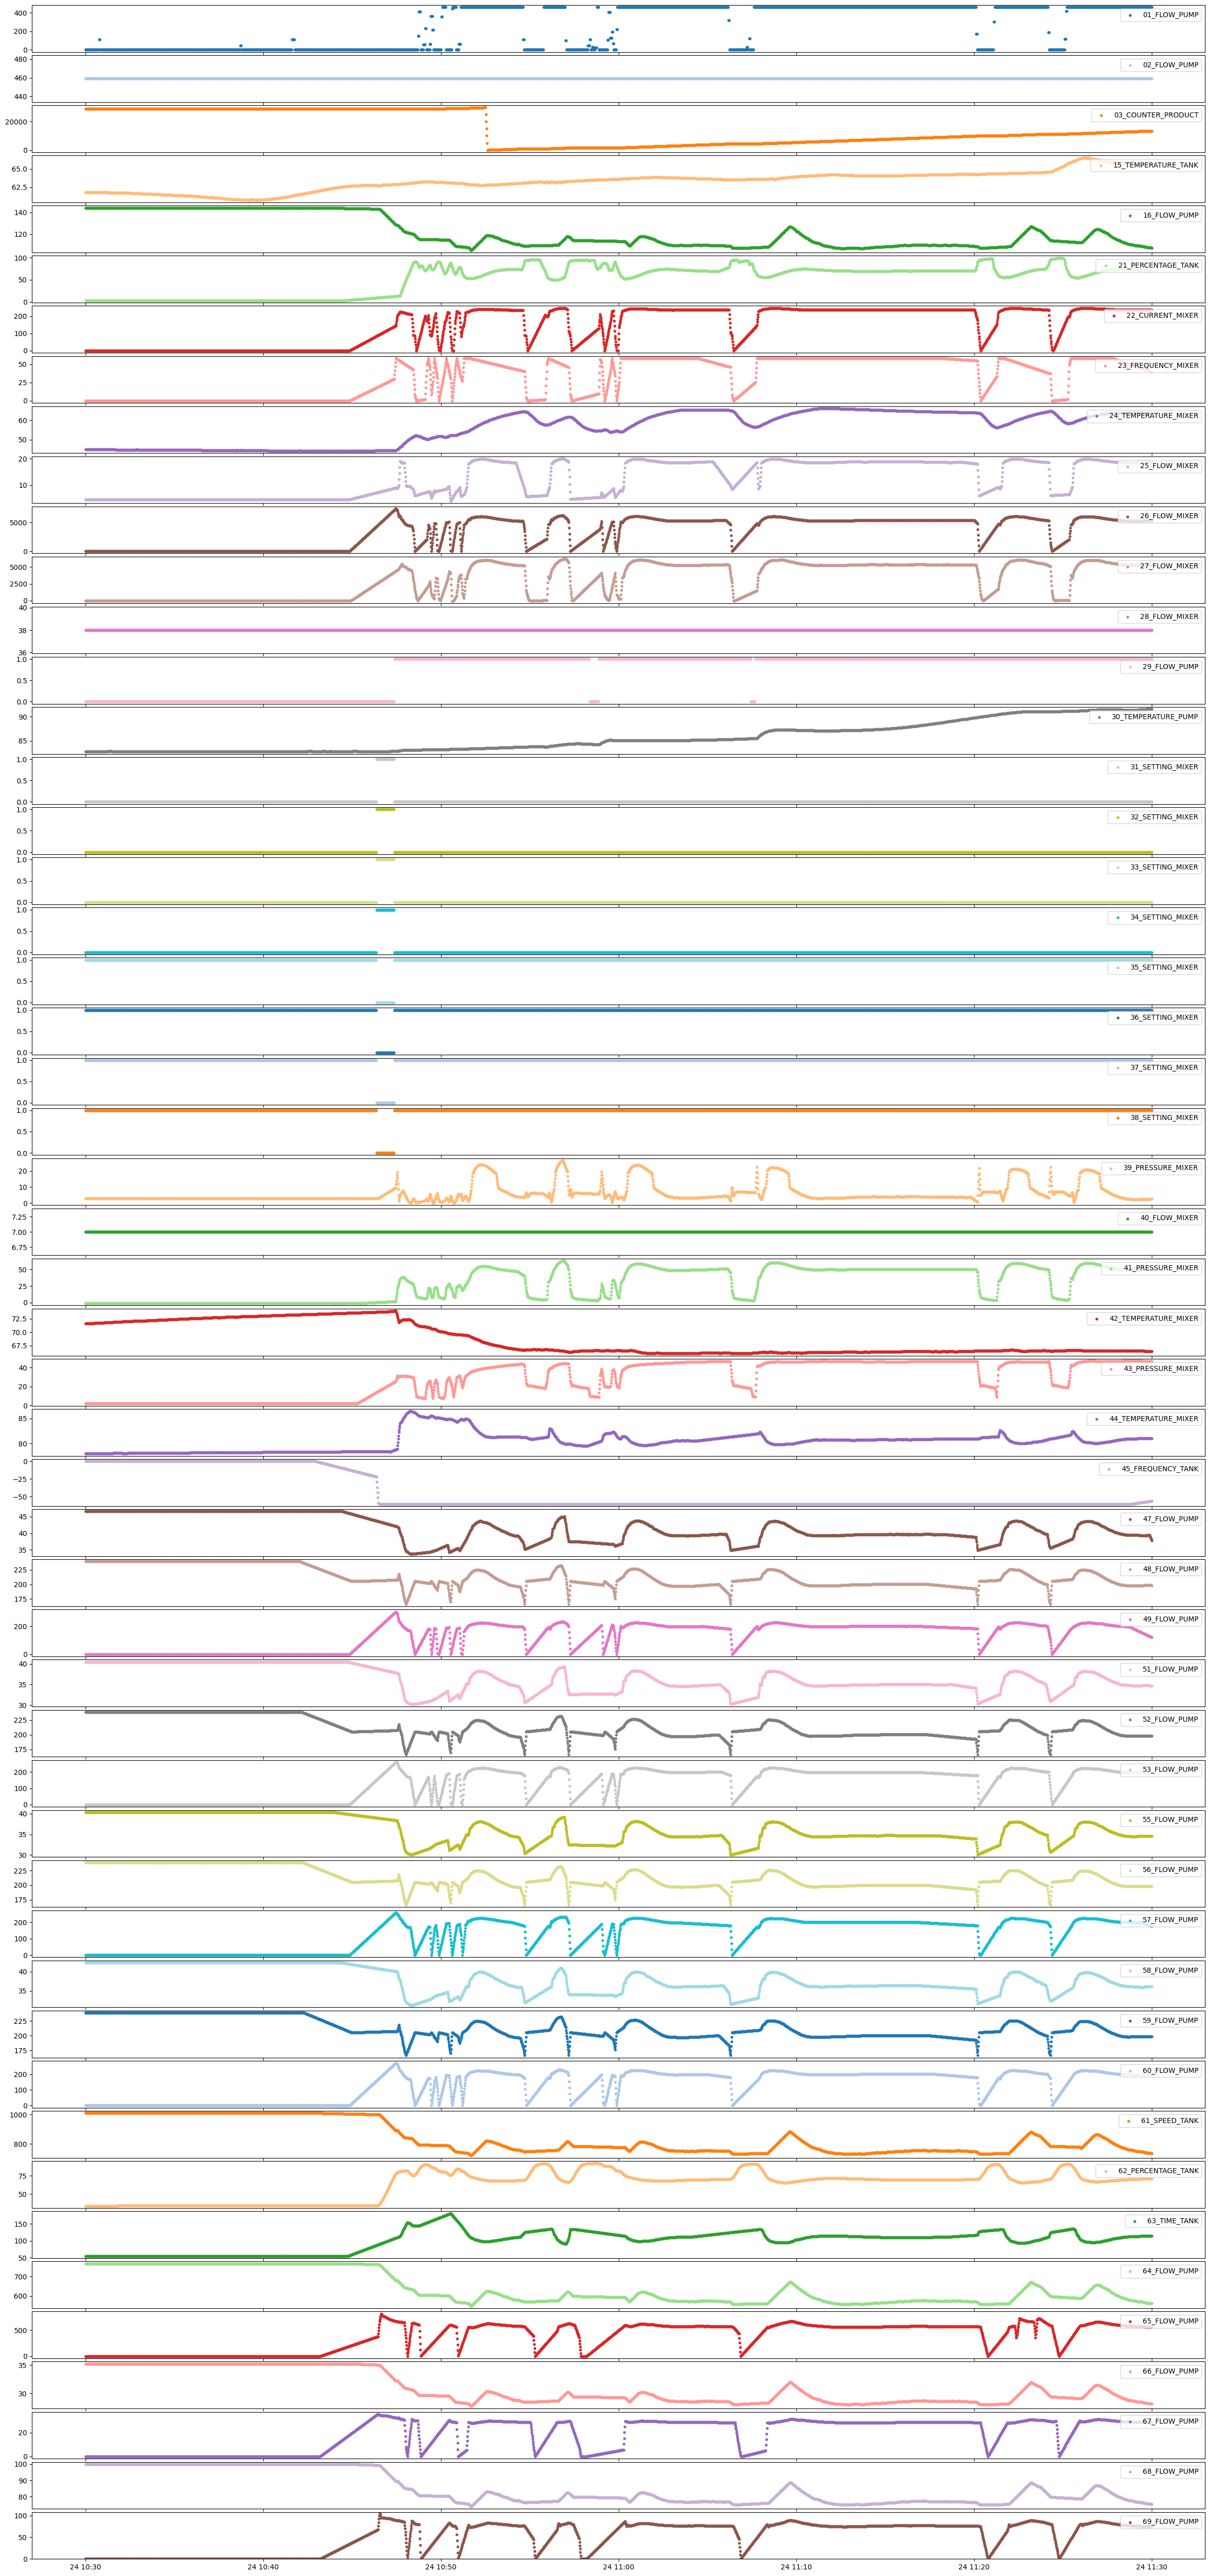

CPU times: user 18.5 s, sys: 1.72 s, total: 20.2 s
Wall time: 19.9 s


In [25]:
%%time
plot_overview(
    df_anon_high_res_interpolated,
    subset=None,
    start="2022-01-24 10:30:00",
    end="2022-01-24 11:30:00",
    kind="scatter",
    normalize=False,
)

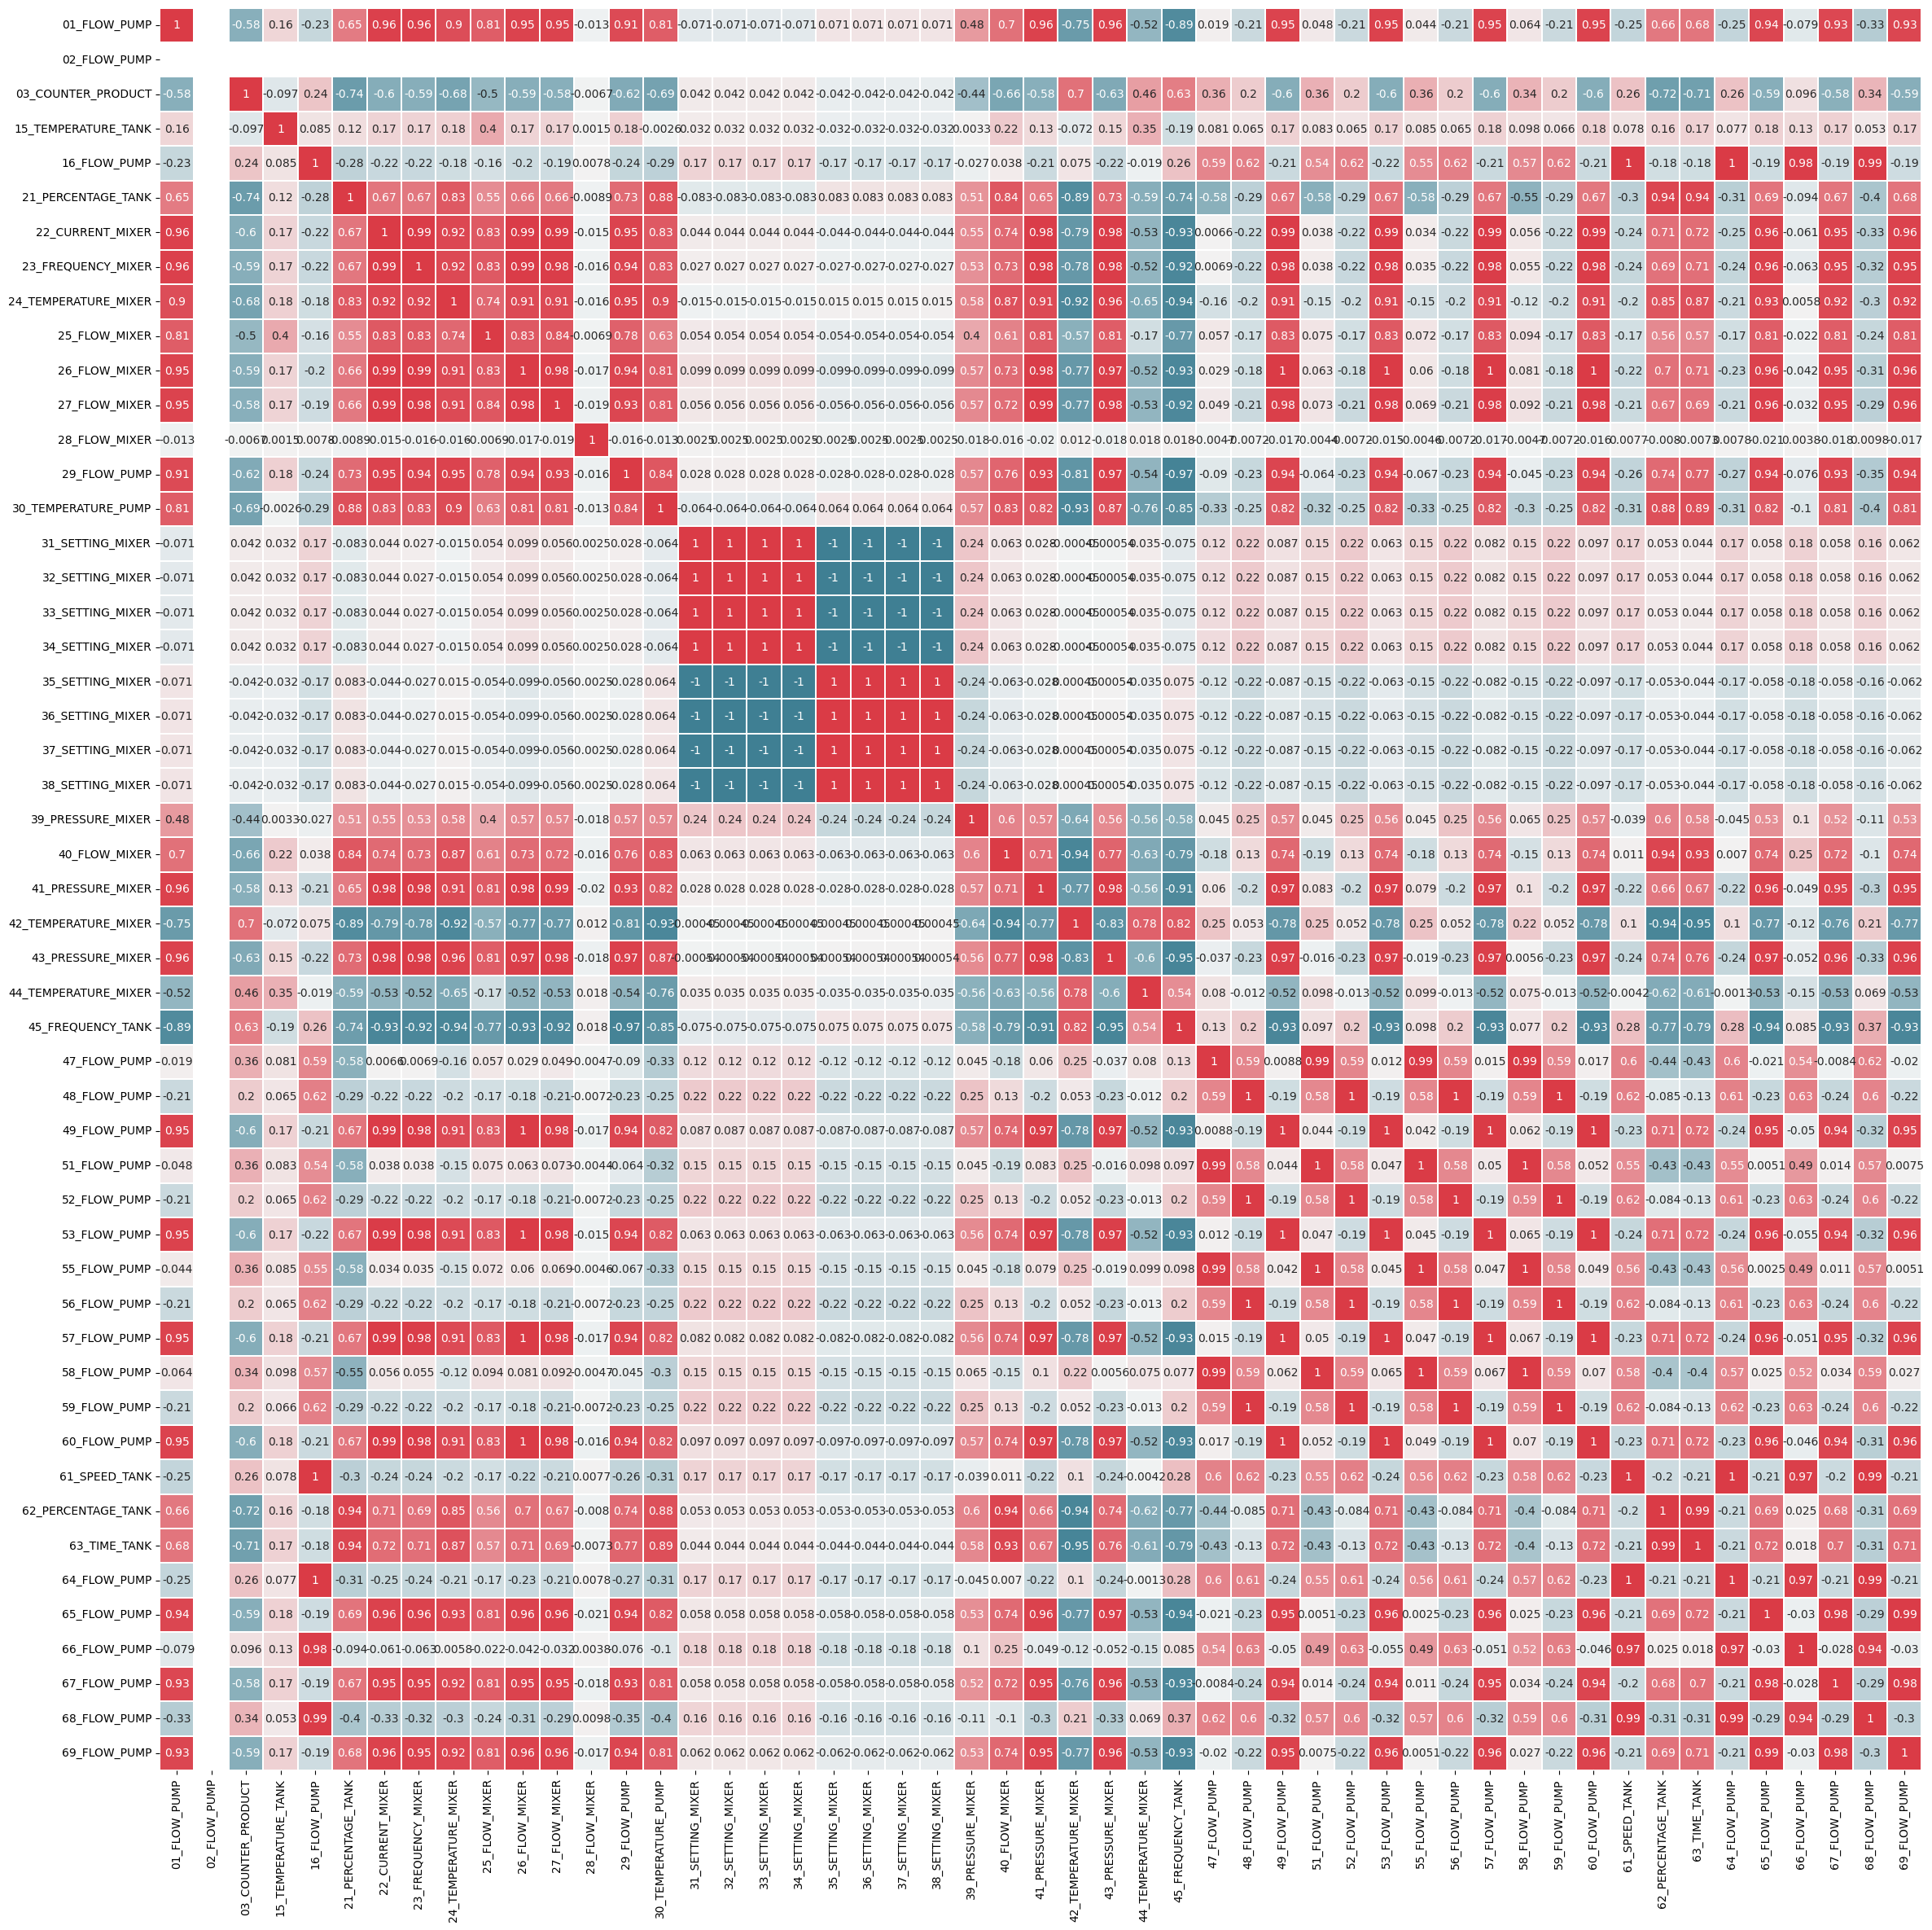

CPU times: user 50.5 s, sys: 1.32 s, total: 51.8 s
Wall time: 51.3 s


In [26]:
%%time
plot_correlation(
    df_anon_high_res_interpolated,
    subset=None,
    start="2022-01-24 00:00:00",
    end="2022-01-24 23:59:59",
    freq=None,
)

## 4.4 Modeling

### 4.4.1 Pivot data

In [27]:
%%time
df_anon_high_res_pivot = df_anon_high_res_interpolated.pivot_table(index="timestamp", columns="sensor_tag", values="value")

CPU times: user 16.7 s, sys: 3.12 s, total: 19.9 s
Wall time: 19.9 s


In [28]:
df_anon_high_res_pivot.head(10)

sensor_tag,SENSOR_01,SENSOR_02,SENSOR_03,SENSOR_15,SENSOR_16,SENSOR_21,SENSOR_22,SENSOR_23,SENSOR_24,SENSOR_25,...,SENSOR_60,SENSOR_61,SENSOR_62,SENSOR_63,SENSOR_64,SENSOR_65,SENSOR_66,SENSOR_67,SENSOR_68,SENSOR_69
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-01-24 00:01:57,0.0,459.0,29025.0,65.89316,115.12669,3.392578,0.133301,-0.113672,41.1,4.335333,...,0.0,796.1105,-0.658861,4.22409,606.4284,0.0,28.936893,0.0,82.04558,0.0
2022-01-24 00:01:58,0.0,459.0,29025.0,65.89390,115.12669,3.392578,0.133301,-0.113672,41.1,4.335333,...,0.0,796.1105,-0.658861,4.22409,606.4284,0.0,28.936893,0.0,82.04558,0.0
2022-01-24 00:01:59,0.0,459.0,29025.0,65.89464,115.12669,3.392578,0.133301,-0.113672,41.1,4.335333,...,0.0,796.1105,-0.658861,4.22409,606.4284,0.0,28.936893,0.0,82.04558,0.0
2022-01-24 00:02:00,0.0,459.0,29025.0,65.89538,115.12669,3.392578,0.133301,-0.113672,41.1,4.335333,...,0.0,796.1105,-0.658861,4.22409,606.4284,0.0,28.936893,0.0,82.04558,0.0
2022-01-24 00:02:01,0.0,459.0,29025.0,65.89612,115.12669,3.392578,0.133301,-0.113672,41.1,4.335333,...,0.0,796.1105,-0.658861,4.22409,606.4284,0.0,28.936893,0.0,82.04558,0.0
2022-01-24 00:02:02,0.0,459.0,29025.0,65.89686,115.12669,3.392578,0.133301,-0.113672,41.1,4.335333,...,0.0,796.1105,-0.658861,4.22409,606.4284,0.0,28.936893,0.0,82.04558,0.0
2022-01-24 00:02:03,0.0,459.0,29025.0,65.89760,115.12669,3.392578,0.133301,-0.113672,41.1,4.335333,...,0.0,796.1105,-0.658861,4.22409,606.4284,0.0,28.936893,0.0,82.04558,0.0
2022-01-24 00:02:04,0.0,459.0,29025.0,65.89834,115.12669,3.392578,0.133301,-0.113672,41.1,4.335333,...,0.0,796.1105,-0.658861,4.22409,606.4284,0.0,28.936893,0.0,82.04558,0.0
2022-01-24 00:02:05,0.0,459.0,29025.0,65.89908,115.12669,3.392578,0.133301,-0.113672,41.1,4.335333,...,0.0,796.1105,-0.658861,4.22409,606.4284,0.0,28.936893,0.0,82.04558,0.0


### 4.4.2 Normalize data

In [29]:
%%time
scaler = MinMaxScaler()
df_anon_high_res_normal = pd.DataFrame(scaler.fit_transform(df_anon_high_res_pivot), columns=df_anon_high_res_pivot.columns, index=df_anon_high_res_pivot.index)

CPU times: user 197 ms, sys: 7.54 ms, total: 205 ms
Wall time: 204 ms


In [30]:
df_anon_high_res_normal.head(10)

sensor_tag,SENSOR_01,SENSOR_02,SENSOR_03,SENSOR_15,SENSOR_16,SENSOR_21,SENSOR_22,SENSOR_23,SENSOR_24,SENSOR_25,...,SENSOR_60,SENSOR_61,SENSOR_62,SENSOR_63,SENSOR_64,SENSOR_65,SENSOR_66,SENSOR_67,SENSOR_68,SENSOR_69
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-01-24 00:01:57,0.002092,0.869565,0.967112,0.745431,0.653349,0.005616,0.020537,0.018208,0.018727,0.03775,...,0.0,0.653021,0.005419,0.0,0.654218,0.0,0.748007,0.0,0.653569,0.0
2022-01-24 00:01:58,0.002092,0.869565,0.967112,0.745449,0.653349,0.005616,0.020537,0.018208,0.018727,0.03775,...,0.0,0.653021,0.005419,0.0,0.654218,0.0,0.748007,0.0,0.653569,0.0
2022-01-24 00:01:59,0.002092,0.869565,0.967112,0.745468,0.653349,0.005616,0.020537,0.018208,0.018727,0.03775,...,0.0,0.653021,0.005419,0.0,0.654218,0.0,0.748007,0.0,0.653569,0.0
2022-01-24 00:02:00,0.002092,0.869565,0.967112,0.745486,0.653349,0.005616,0.020537,0.018208,0.018727,0.03775,...,0.0,0.653021,0.005419,0.0,0.654218,0.0,0.748007,0.0,0.653569,0.0
2022-01-24 00:02:01,0.002092,0.869565,0.967112,0.745505,0.653349,0.005616,0.020537,0.018208,0.018727,0.03775,...,0.0,0.653021,0.005419,0.0,0.654218,0.0,0.748007,0.0,0.653569,0.0
2022-01-24 00:02:02,0.002092,0.869565,0.967112,0.745523,0.653349,0.005616,0.020537,0.018208,0.018727,0.03775,...,0.0,0.653021,0.005419,0.0,0.654218,0.0,0.748007,0.0,0.653569,0.0
2022-01-24 00:02:03,0.002092,0.869565,0.967112,0.745542,0.653349,0.005616,0.020537,0.018208,0.018727,0.03775,...,0.0,0.653021,0.005419,0.0,0.654218,0.0,0.748007,0.0,0.653569,0.0
2022-01-24 00:02:04,0.002092,0.869565,0.967112,0.745560,0.653349,0.005616,0.020537,0.018208,0.018727,0.03775,...,0.0,0.653021,0.005419,0.0,0.654218,0.0,0.748007,0.0,0.653569,0.0
2022-01-24 00:02:05,0.002092,0.869565,0.967112,0.745579,0.653349,0.005616,0.020537,0.018208,0.018727,0.03775,...,0.0,0.653021,0.005419,0.0,0.654218,0.0,0.748007,0.0,0.653569,0.0


### 4.4.3 Ruptures modeling

Docs: https://centre-borelli.github.io/ruptures-docs/

In [31]:
import ruptures as rpt

In [32]:
X = df_anon_high_res_normal.loc["2022-01-24 10:00:00":"2022-01-24 12:30:00"].to_numpy()

#### 4.4.3.1 Dynamic programming

In [ ]:
%%time
# NOTE(tomdewildt): ...
algorithm = rpt.Dynp(model="l1", min_size=3, jump=2).fit(X)
y_pred = algorithm.predict(n_bkps=3)

rpt.display(X, [], y_pred)
plt.show()

#### 4.4.3.2 Linearly penalized segmentation

In [ ]:
%%time
# NOTE(tomdewildt): ...
algorithm = rpt.Pelt(model="rbf").fit(X)
y_pred = algorithm.predict(pen=10)

rpt.display(X, [], y_pred)
plt.show()

#### 4.4.3.3 Kernel change point detection

In [ ]:
%%time
# NOTE(tomdewildt): ...
algorithm = rpt.KernelCPD(kernel="linear", min_size=2).fit(X)
y_pred = algorithm.predict(n_bkps=3)

rpt.display(X, [], y_pred)
plt.show()

#### 4.4.3.4 Binary segmentation

In [ ]:
%%time
# NOTE(tomdewildt): ...
algorithm = rpt.Binseg(model="l2").fit(X)
y_pred = algorithm.predict(n_bkps=3)

rpt.display(X, [], y_pred)
plt.show()

#### 4.4.3.5 Bottom-up segmentation

In [ ]:
%%time
# NOTE(tomdewildt): ...
algorithm = rpt.BottomUp(model="l2").fit(X)
y_pred = algorithm.predict(n_bkps=3)

rpt.display(X, [], y_pred)
plt.show()

#### 4.4.3.6 Window-based change point detection

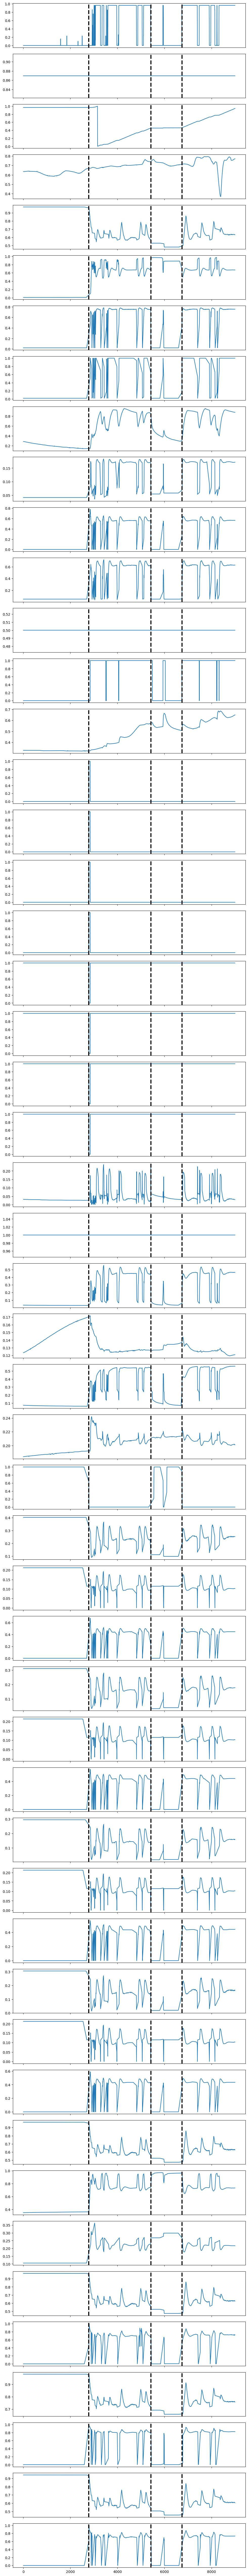

CPU times: user 6.17 s, sys: 837 ms, total: 7.01 s
Wall time: 5.97 s


In [33]:
%%time
# NOTE(tomdewildt): ...
algorithm = rpt.Window(width=15*60, model="l2").fit(X) # 15min (batch) * 60sec (each observation 1sec)
y_pred = algorithm.predict(n_bkps=3)

rpt.display(X, [], y_pred)
plt.show()

### 4.4.4 Sktime modeling

Docs: https://www.sktime.org/en/stable/get_started.html

In [ ]:
from sktime.annotation.igts import InformationGainSegmentation

In [ ]:
X = df_anon_high_res_normal.loc["2022-01-24 10:00:00":"2022-01-24 12:30:00"].to_numpy()

#### 4.4.4.1 ClaSPSegmentation

#### 4.4.4.2 GaussianHMM

#### 4.4.4.3 GMMHMM

#### 4.4.4.4 Greedy Gaussian Segmentation

#### 4.4.4.5 HMM

#### 4.4.4.6 InformationGainSegmentation

In [ ]:
%%time
# NOTE(tomdewildt): ...
igts = InformationGainSegmentation(k_max=3, step=2)
y_pred = igts.fit_predict(X)

#### 4.4.4.7 STRAY

#### 4.4.4.8 PyODAnnotator

# 99. Scratch